<a href="https://colab.research.google.com/github/ayushsyntax/ML_Journey/blob/main/ML_01(California_Housing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **"California Housing Prices"**


**Project:** *Predicting House Prices in California*

**Objective:**
The goal is to predict the median house price (median_house_value) based on various features like location, population, median income, etc., using Linear Regression.



In [12]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
data = fetch_california_housing(as_frame = True)
df = data.frame #convert to pandas DataFrame
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [2]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [3]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


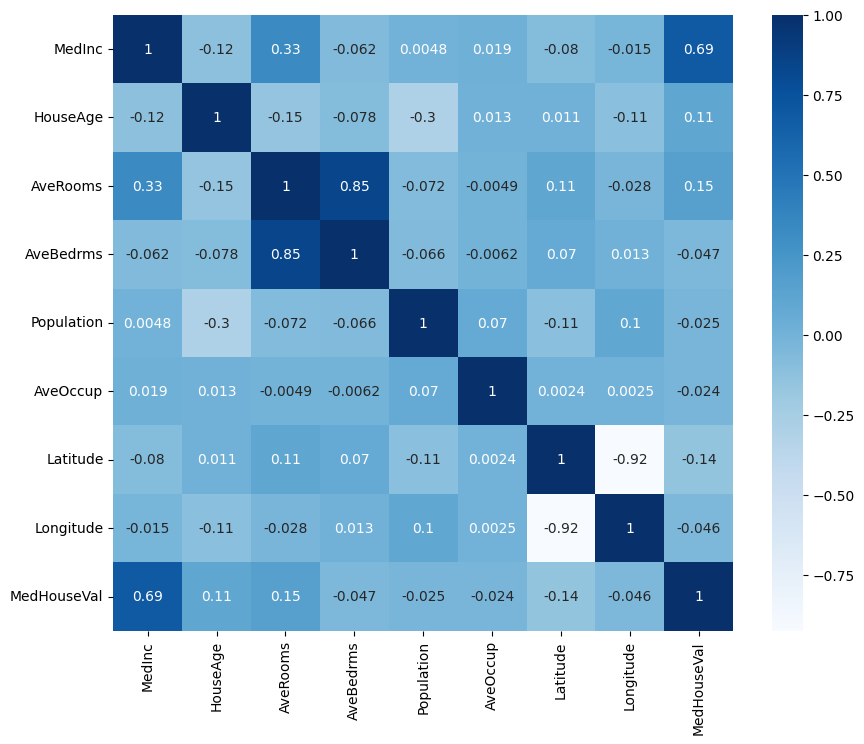

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()

Key observations:

The target variable (MedHouseVal) has a strong positive correlation with MedInc (median income).

Other features like AveRooms, AveBedrms, and Population may also influence house prices.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Step 3: Prepare the data
X = df.drop(columns=['MedHouseVal']) #Drop the target variable
y =df['MedHouseVal']

# Split into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [13]:
# Step 4: Train the model
model = LinearRegression()
model.fit(X_train,y_train)

print(f"Intercept:{model.intercept_}")
print(f"Coefficients:{model.coef_}")

Intercept:-37.02327770606409
Coefficients:[ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]


In [14]:
# Step 5: Make predictions
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R2: {r2}")

MSE: 0.5558915986952444, RMSE: 0.7455813830127764, R2: 0.5757877060324508


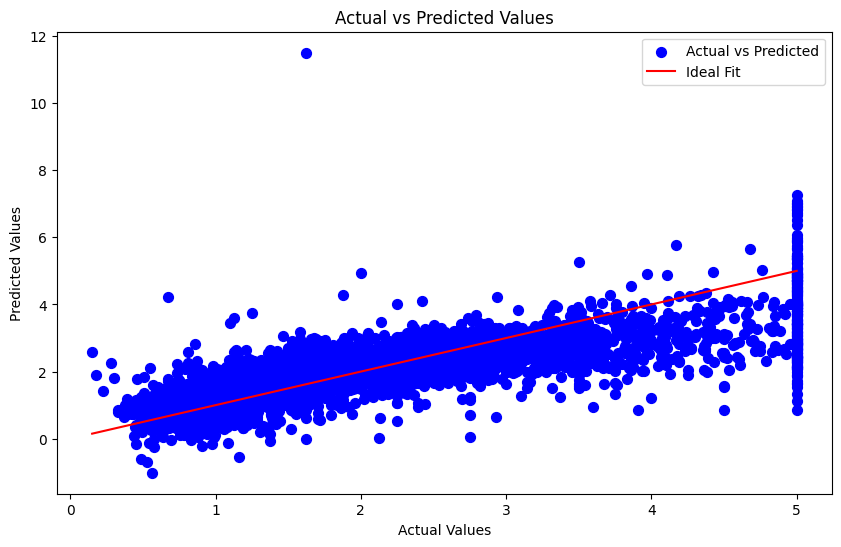

In [24]:
#  Step 7: Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label="Actual vs Predicted", s=50)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

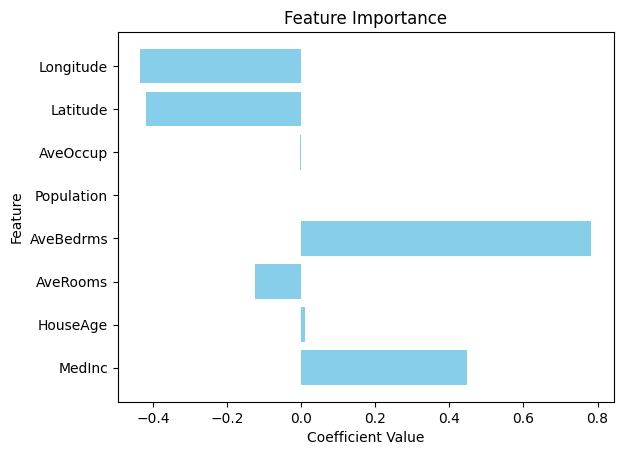

In [25]:
# Step 8: Feature importance
plt.barh(X.columns, model.coef_, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler
import joblib

In [27]:
# Step 9: Scaling and retraining
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.fit(X_train_scaled,y_train)
y_pred_scaled = model.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test,y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)
print(f"Scaled MSE: {mse_scaled}, Scaled RMSE: {rmse_scaled}, Scaled R2: {r2_scaled}")

Scaled MSE: 0.5558915986952442, Scaled RMSE: 0.7455813830127763, Scaled R2: 0.575787706032451


In [32]:
# Step 10: Save the model
joblib.dump(model, 'linear_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Save the scaler

['scaler.pkl']

In [38]:
import joblib

# Load the trained model and scaler
model = joblib.load('linear_regression_model.pkl')
scaler = joblib.load('scaler.pkl')

In [39]:
from ipywidgets import interact, FloatSlider, Button, VBox, HBox, Label
import ipywidgets as widgets
import pandas as pd

# Define the function to handle predictions
def predict_price(med_inc, house_age, ave_rooms, ave_bedrms, population, ave_occup, latitude, longitude):
    # Create a DataFrame from the user inputs
    input_data = pd.DataFrame({
        'MedInc': [med_inc],
        'HouseAge': [house_age],
        'AveRooms': [ave_rooms],
        'AveBedrms': [ave_bedrms],
        'Population': [population],
        'AveOccup': [ave_occup],
        'Latitude': [latitude],
        'Longitude': [longitude]
    })

    # Scale the input data
    input_scaled = scaler.transform(input_data)

    # Predict the house price
    predicted_price = model.predict(input_scaled)[0]
    return f"Predicted Median House Value: ${predicted_price * 100000:.2f}"

# Create interactive widgets for user input
med_inc_slider = FloatSlider(min=0.5, max=15, step=0.1, value=5.0, description="Median Income (tens of thousands)")
house_age_slider = FloatSlider(min=1, max=50, step=1, value=30, description="House Age (years)")
ave_rooms_slider = FloatSlider(min=1, max=10, step=0.1, value=6.0, description="Avg Rooms")
ave_bedrms_slider = FloatSlider(min=1, max=5, step=0.1, value=2.0, description="Avg Bedrooms")
population_slider = FloatSlider(min=100, max=5000, step=10, value=1000, description="Population")
ave_occup_slider = FloatSlider(min=1, max=10, step=0.1, value=3.0, description="Avg Occupancy")
latitude_slider = FloatSlider(min=32, max=42, step=0.01, value=34.1, description="Latitude")
longitude_slider = FloatSlider(min=-125, max=-114, step=0.01, value=-118.2, description="Longitude")

# Use interact to link the widgets to the prediction function
interact(
    predict_price,
    med_inc=med_inc_slider,
    house_age=house_age_slider,
    ave_rooms=ave_rooms_slider,
    ave_bedrms=ave_bedrms_slider,
    population=population_slider,
    ave_occup=ave_occup_slider,
    latitude=latitude_slider,
    longitude=longitude_slider
)

interactive(children=(FloatSlider(value=5.0, description='Median Income (tens of thousands)', max=15.0, min=0.…

<function __main__.predict_price(med_inc, house_age, ave_rooms, ave_bedrms, population, ave_occup, latitude, longitude)>

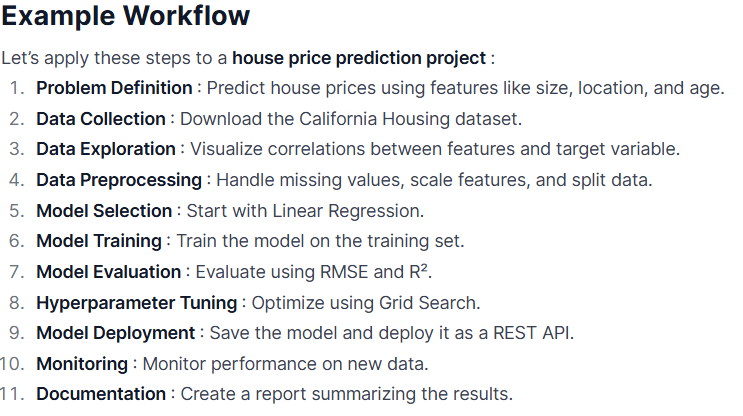